In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

### 0
Сгенерировать точки $(x, y)$ 500 шт. такие, что $y = 0.5 x + 1 + \varepsilon$, где $\varepsilon \sim N (0, 0.2)$

In [2]:
x0, step = np.linspace(-10, 10, 500, retstep=True)
y0 = 0.5 * x0 + 1 + scipy.randn(500) * np.sqrt(0.2)

In [3]:
x = x0
y = y0

In [4]:
xy = np.asarray(zip(x, y))

### 1
Визуализируйте выборку

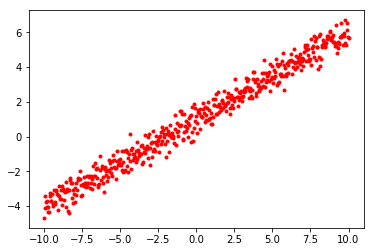

In [5]:
plt.plot(x, y, 'r.')

### 2
По этим точкам восстановите зависимость $y = k x + b$ оптимизируя MSE в scipy и визуализируйте прямую.

In [6]:
def y_hatted(x, k, b):
    return k * x + b

In [7]:
y_hatted_vectorized = np.vectorize(y_hatted, excluded={'k', 'b'})

In [8]:
def y_opt(kb):
    k, b = kb
    return np.sum((y - y_hatted_vectorized(x, k, b)) ** 2)

In [9]:
res = scipy.optimize.minimize(y_opt, [1, 0])

In [10]:
res

      fun: 104.14551530509618
 hess_inv: array([[  3.01816477e-05,  -1.77594458e-06],
       [ -1.77594458e-06,   9.88324247e-04]])
      jac: array([  2.13623047e-04,  -4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 140
      nit: 4
     njev: 32
   status: 2
  success: False
        x: array([ 0.50332393,  1.01394958])

In [11]:
ko, bo = res.x

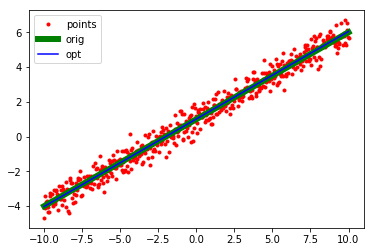

In [12]:
plt.plot(x, y, 'r.')
plt.plot(x, y_hatted_vectorized(x, 0.5, 1), 'g', linewidth=6)
plt.plot(x, y_hatted_vectorized(x, ko, bo), 'b')
plt.legend(['points', 'orig', 'opt'])
plt.show()

### 3
Добавьте 75 точек шума $y = -1 + \varepsilon$, и т. п. 

In [13]:
step

0.040080160320641281

In [14]:
xnoise = np.asarray(list(-10.0 + 0.5 * step + i * 500 / 75.03 * step for i in range(75)))
assert len(set(xnoise) | set(x0)) == 575
ynoise = -1 + scipy.randn(75) * np.sqrt(0.2)

In [15]:
x = np.append(x0, xnoise)
y = np.append(y0, ynoise)

In [16]:
x.shape

(575,)

#### MSE

In [17]:
res = scipy.optimize.minimize(y_opt, [1, 0])

In [18]:
res

      fun: 922.3148308999148
 hess_inv: array([[  2.59967971e-05,   2.40919442e-06],
       [  2.40919442e-06,   8.69595796e-04]])
      jac: array([  0.00000000e+00,  -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([ 0.43854886,  0.7558686 ])

In [19]:
ko, bo = res.x

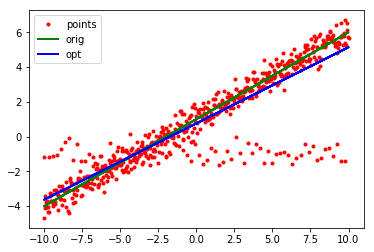

In [20]:
plt.plot(x, y, 'r.')
plt.plot(x, y_hatted_vectorized(x, 0.5, 1), 'g', linewidth=2)
plt.plot(x, y_hatted_vectorized(x, ko, bo), 'b', linewidth=2)
plt.legend(['points', 'orig', 'opt'])
plt.show()

#### MAE

In [21]:
def y_opt(kb):
    k, b = kb
    return np.sum(np.abs(y - y_hatted_vectorized(x, k, b)))

In [22]:
x = np.append(x0, xnoise)
y = np.append(y0, ynoise)

In [23]:
x.shape

(575,)

In [24]:
res = scipy.optimize.minimize(y_opt, [1, 0])

In [25]:
res

      fun: 400.7331609255759
 hess_inv: array([[  5.66439060e-05,  -9.56250560e-05],
       [ -9.56250560e-05,   6.52302820e-04]])
      jac: array([ 0.85228729, -1.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 392
      nit: 9
     njev: 95
   status: 2
  success: False
        x: array([ 0.49202917,  0.96978009])

In [26]:
ko, bo = res.x

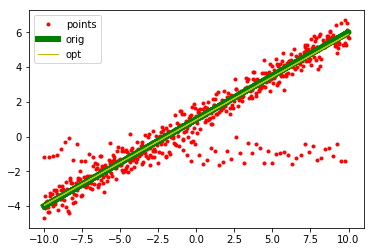

In [27]:
plt.plot(x, y, 'r.')
plt.plot(x, y_hatted_vectorized(x, 0.5, 1), 'g', linewidth=6)
plt.plot(x, y_hatted_vectorized(x, ko, bo), 'y', linewidth=1)
plt.legend(['points', 'orig', 'opt'])
plt.show()

### 4

ВЫВОД:
Оптимизация по MAE менее подвержена влиянию выбросов, чем MSE. Это происходит ввиду очевидных причин - в MSE выбросы вносят квадратичный штраф, а в MAE - линейный.